(96453, 12)
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000    

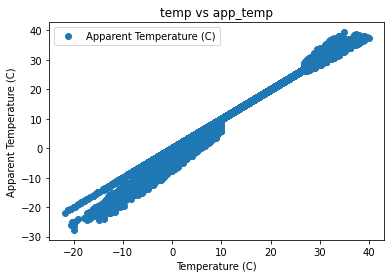

<Figure size 1080x720 with 0 Axes>

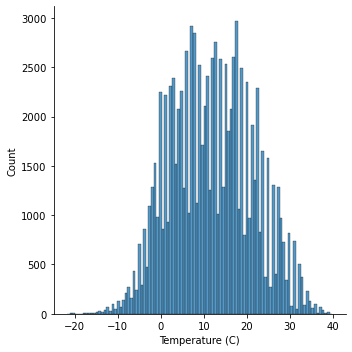

Intercept: [-2.41617514]
Coefficient [[1.11197025]]
          Actual  Predicted
0      14.422222  13.620907
1      12.155556  11.100441
2      23.961111  24.227868
3      15.000000  14.263379
4      12.800000  11.817044
...          ...        ...
19286  28.255556  29.707410
19287  17.216667  16.728246
19288  -1.000000  -3.528145
19289   7.327778   5.732096
19290  16.061111  15.443303

[19291 rows x 2 columns]


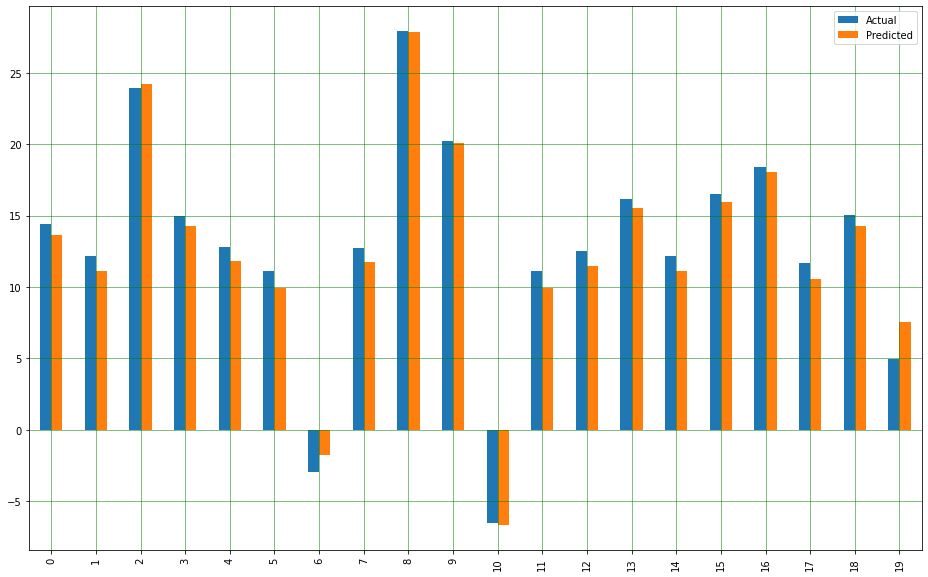

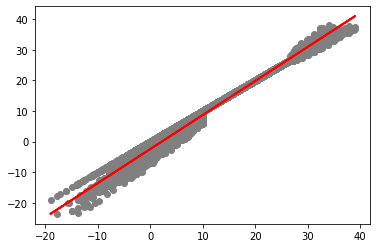

Mean absolute error: 0.9946153181403564
Mean Squared Error: 1.6820729326083665
RMS error: 1.296947544277858


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

dataset= pd.read_csv('D:\PPr\weatherHistory.csv')

print(dataset.shape) #the dimensions of the dataset

print(dataset.describe()) # describes the dataset


# plotting the relationship between humidity and wind speed
dataset.plot(x='Temperature (C)', y='Apparent Temperature (C)', style='o')
plt.title('temp vs app_temp')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()



#plot the data of humidity
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(dataset['Temperature (C)'])
plt.show()



#data splicing
x = dataset['Temperature (C)'].values.reshape(-1,1)
y = dataset['Apparent Temperature (C)'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor= LinearRegression()
# training the model
regressor.fit(x_train, y_train) 


#calculate the intercept
print('Intercept:', regressor.intercept_)
print('Coefficient',regressor.coef_)



# predictions for 'y' from values of 'x'
y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)



#to increase accuracy train the model with more data 


#plotting the predictions and actual values for comparison
df1=df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



#plotting the straight line relation of temp and predicted app_temp
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()



#performance evaluations
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('RMS error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
